In [213]:
import numpy as np
import pylab
from mpl_toolkits.mplot3d import Axes3D
import scipy
import sklearn
import folium
from sklearn import cluster
import pandas as pd
from IPython.display import HTML, display

In [58]:
def separate(string):
    separated=[]
    semic=[-1]
    reverse=string[::-1]
    lastword=string[-reverse.find(';'):-1]
    for posi in range(len(string)):
        if string[posi]==';':
            semic.append(posi)
    for positionx in range(len(semic)-1):
        word=string[semic[positionx]+1:semic[positionx+1]]
        separated.append(word)
    separated.append(lastword)
    return separated
#for line in open('police-incident-reports-written.csv','r'):
    #print(line)
    #print(separate(line))
total=[]
#for line in open('police-incident-reports-written.csv','r'):
 #   total.append(separate(line))
#print(total)
incident_report= pd.read_excel('policeIncident.xlsx')
incident_report.head()

Agency                  Offense                          Street  \
0   CHPD         LOUD MUSIC/PARTY               715 N COLUMBIA ST   
1   CHPD         LOUD MUSIC/PARTY  602 MARTIN LUTHER KING JR BLVD   
2   CHPD     COUNTERFEITING-USING                106 S ELLIOTT RD   
3   CHPD  B&E VEH (ATT LAR F/VEH)                   206 SUNSET DR   
4   CHPD              INFORMATION             529 HILLSBOROUGH RD   

          City State Forcible  Incident ID  Zipcode Date of Report  \
0  CHAPEL HILL    NC      NaN     172197.0  27516.0     2019-06-29   
1  CHAPEL HILL    NC      NaN     172178.0  27514.0     2019-06-29   
2  CHAPEL HILL    NC      NaN     172166.0  27514.0     2019-06-29   
3  CHAPEL HILL    NC      NaN     172192.0  27514.0     2019-06-29   
4  CHAPEL HILL    NC      NaN     172179.0  27514.0     2019-06-29   

  Date of Occurrence Date Found      Reported As Premise Description  \
0         2019-06-29 2019-06-29  DISTURBANCE/NUI                 NaN   
1         2019-06-29 2019-06-29   PUBLIC SERVICE                 NaN   
2         2019-06-29 2019-06-29  FRAUD OR DECEPT                 NaN   
3         2019-06-29 2019-06-29    THEFT/LARCENY                 NaN   
4         2019-06-29 2019-06-29  DISTURBANCE/NUI                 NaN   

  Weapon Description  Victim Age Victim Race Victim Gender  \
0                NaN         NaN         NaN           NaN   
1                NaN         NaN         NaN           NaN   
2                NaN         NaN         NaN           NaN   
3                NaN        21.0           W             F   
4                NaN         NaN         NaN           NaN   

           latitude_longitude  
0  35.920936529,-79.058722526  
1  35.918973128,-79.056274862  
2  35.933858794,-79.028280064  
3  35.911602461,-79.066186037  
4  35.922735953,-79.051485356

[35.92588692356335, -79.04975626266871]


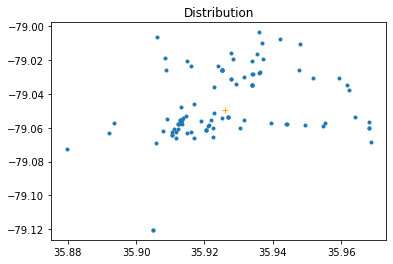

In [24]:
xcoords=[]
ycoords=[]
x_coo=[]
y_coo=[]
for line in open('police-incident-reports-written.csv','r'):
    eachcrime=separate(line)
    coords=str(eachcrime[-1])
    if coords=='':
        continue
    xcoords.append(coords[:coords.find(',')])
    ycoords.append(coords[coords.find(',')+2:])
#print(xcoords)
#print(ycoords)
x_coo=xcoords[1:]
y_coo=ycoords[1:]
x_value=[]
y_value=[]
coords=[[],[]]
for itemx in x_coo:
    x_value.append(float(itemx))
    coords[0].append(float(itemx))
for itemy in y_coo:
    y_value.append(-float(itemy))
    coords[1].append(float(itemy))
x_value=np.array(x_value)
y_value=np.array(y_value)
coords=np.array(coords)
center=[np.average(x_value),np.average(y_value)]
print(center)
pylab.plot(x_value[:100], y_value[:100],'.')
pylab.plot(center[0], center[1],'+',color='orange')
pylab.title('Distribution')
pylab.xlabel('Latitude')
pylab.ylabel('Longitude')
pylab.show()

In [25]:
coords1=np.concatenate([x_value,y_value]).reshape((len(x_value),2),order='F')
coords2=np.reshape(coords1,(2,len(x_value)))


coords_final= coords1[(coords1[:,0]>35.75)&(coords1[:,0]<36.25)&(coords1[:,1]>-79.25)&(coords1[:,1]<-78.75)]
print(coords_final)


[[ 35.92093653 -79.05872253]
 [ 35.91897313 -79.05627486]
 [ 35.93385879 -79.02828006]
 ...
 [ 35.9503348  -79.02250452]
 [ 35.93401    -79.03479   ]
 [ 35.90280671 -79.06709927]]


[35.92588692356335, -79.04975626266871]


NameError: name 'clust1' is not defined

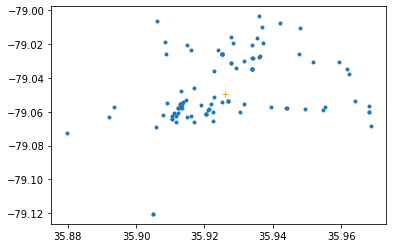

In [27]:
xcoords=[]
ycoords=[]
x_coo=[]
y_coo=[]
for line in open('police-incident-reports-written.csv','r'):
    eachcrime=separate(line)
    coords=str(eachcrime[-1])
    if coords=='':
        continue
    xcoords.append(coords[:coords.find(',')])
    ycoords.append(coords[coords.find(',')+2:])
#print(xcoords)
#print(ycoords)
x_coo=xcoords[1:]
y_coo=ycoords[1:]
x_value=[]
y_value=[]
coords=[[],[]]
for itemx in x_coo:
    x_value.append(float(itemx))
    coords[0].append(float(itemx))
for itemy in y_coo:
    y_value.append(-float(itemy))
    coords[1].append(float(itemy))
x_value=np.array(x_value)
y_value=np.array(y_value)
coords=np.array(coords)
center=[np.average(x_value),np.average(y_value)]
print(center)
pylab.plot(x_value[:100], y_value[:100],'.')
pylab.plot(center[0], center[1],'+',color='orange')
pylab.plot(clust1[:,0],clust1[:,1],'.', color='red')
pylab.title('Distribution')
pylab.xlabel('Latitude')
pylab.ylabel('Longitude')
pylab.show()



In [289]:
np.random.seed(1)
iMax=15000
randomlist=np.random.choice(coords_final.shape[0], iMax)
print(randomlist)
diffcl=sklearn.cluster.KMeans(n_clusters=4)
diffcl.fit(coords_final)

[ 5192 50057 21440 ... 13732 23407 35392]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

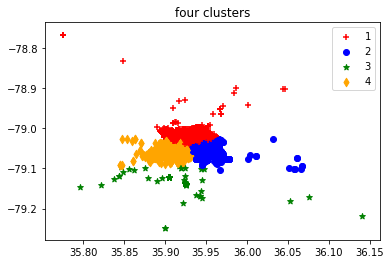

In [290]:


for items in randomlist:
    if diffcl.labels_[items]==0:
        c0=pylab.scatter(coords_final[items,0],coords_final[items,1],c='red',marker='+')
    elif diffcl.labels_[items]==1:
        c1=pylab.scatter(coords_final[items,0],coords_final[items,1],c='blue',marker='o')
    elif diffcl.labels_[items]==2:
        c2=pylab.scatter(coords_final[items,0],coords_final[items,1],c='green',marker='*')
    elif diffcl.labels_[items]==3:
        c3=pylab.scatter(coords_final[items,0],coords_final[items,1],c='orange',marker='d')
pylab.legend([c0,c1,c2,c3],['1','2','3','4'])
pylab.xlabel('Latitude')
pylab.ylabel('Longitude')
pylab.title('four clusters')
pylab.show()

In [ ]:

for items in range(coords_final.shape[0]):
    if diffcl.labels_[items]==0:
        c0=pylab.scatter(coords_final[items,0],coords_final[items,1],c='red',marker='+')
    elif diffcl.labels_[items]==1:
        c1=pylab.scatter(coords_final[items,0],coords_final[items,1],c='blue',marker='o')
    elif diffcl.labels_[items]==2:
        c2=pylab.scatter(coords_final[items,0],coords_final[items,1],c='green',marker='*')
    elif diffcl.labels_[items]==3:
        c3=pylab.scatter(coords_final[items,0],coords_final[items,1],c='orange',marker='d')
pylab.legend([c0,c1,c2,c3],['1','2','3','4'])
pylab.title('four clusters')
pylab.show()

In [329]:
UNC_COORDINATES = (35.9258, -79.0497)

np.random.seed(1)

# for speed purposes

MAX_RECORDS=1400
randomlist2=np.random.choice(coords_final.shape[0], MAX_RECORDS)
# create empty map zoomed in on San Francisco
map = folium.Map(location=UNC_COORDINATES, zoom_start=12)


for items in range(MAX_RECORDS):
    note=popupnote1(str(coords_final[items][0])+','+str(coords_final[items][1]))
    if diffcl.labels_[items]==0:
        folium.Marker(location = [coords_final[items][0],coords_final[items][1]], popup=note, icon=folium.Icon(color='red', icon='info-sign')).add_to(map)
    elif diffcl.labels_[items]==1:
        folium.Marker(location = [coords_final[items][0],coords_final[items][1]], popup=note , icon=folium.Icon(color='blue', icon='info-sign')).add_to(map)
    elif diffcl.labels_[items]==2:
        folium.Marker(location = [coords_final[items][0],coords_final[items][1]],popup=note ,  icon=folium.Icon(color='green', icon='info-sign')).add_to(map)
    elif diffcl.labels_[items]==3:
        folium.Marker(location = [coords_final[items][0],coords_final[items][1]], popup=note ,icon=folium.Icon(color='orange', icon='info-sign')).add_to(map)
# add a marker for every record in the filtered data, use a clustered view
display(map)


In [258]:
def popupnote1(string):
    pup='Location: '+string+'\n'
    table1=incident_report[incident_report['latitude_longitude']==string][['Reported As','Offense']]
    pup=pup+'Number of Crimes: '+ str(table1.shape[0])
    return pup

In [253]:
def popuonote1(string):
    pup='Location: '+string+'\n'
    table1=incident_report[incident_report['latitude_longitude']==string][['Reported As','Offense']]
    pup=pup+'Number of Crimes: '+ str(table1.shape[0])
    return pup

In [233]:
num_crime= np.zeros((coords_final.shape[0],1))
for i in range (coords_final.shape[0]):
    string=str(coords_final[i][0])+','+str(coords_final[i][1])
    num_crime[i]=incident_report[incident_report['latitude_longitude']==string][['Reported As','Offense']].shape[0]


In [247]:
Max=coords_final.shape[0]
kmean=sklearn.cluster.KMeans(n_clusters=4)
kmean.fit(coords_final[:Max,:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [245]:
data={'Lat': coords_final[:Max,0].reshape(Max),'Long':coords_final[:Max,1].reshape(Max),'No:OfCrimes':num_crime[:Max].reshape(Max), 'ClusterLabel':diffcl.labels_.reshape(Max)}
df=pd.DataFrame(data)

In [246]:
df.head()

Lat       Long  No:OfCrimes  ClusterLabel
0  35.920937 -79.058723          9.0             3
1  35.918973 -79.056275        184.0             3
2  35.933859 -79.028280          3.0             2
3  35.911602 -79.066186         13.0             3
4  35.922736 -79.051485        115.0             3

In [294]:
for line2 in open('neighborhoods.csv','r'):
    print(line2)
    #print(separate(line2))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[35.925389389400415, -79.04465874546571]


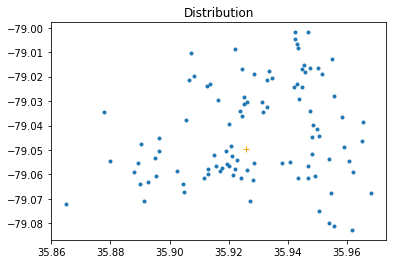

In [295]:
nxcoords=[]
nycoords=[]
nx_coo=[]
ny_coo=[]
for line in open('neighborhoods.csv','r'):
    eachnab=separate(line)
    ncoords=str(eachnab[-1])
    if ncoords=='':
        continue
    nxcoords.append(ncoords[:ncoords.find(',')])
    nycoords.append(ncoords[ncoords.find(',')+2:])
#print(xcoords)
#print(ycoords)
nx_coo=nxcoords[1:]
ny_coo=nycoords[1:]
nx_value=[]
ny_value=[]
ncoords=[[],[]]
for nitemx in nx_coo:
    nx_value.append(float(nitemx))
    ncoords[0].append(float(nitemx))
for nitemy in ny_coo:
    ny_value.append(-float(nitemy))
    ncoords[1].append(float(nitemy))
nx_value=np.array(nx_value)
ny_value=np.array(ny_value)
ncoords=np.array(ncoords)
ncenter=[np.average(nx_value),np.average(ny_value)]
print(ncenter)
pylab.plot(nx_value[:100], ny_value[:100],'.')
pylab.plot(center[0], center[1],'+',color='orange')
pylab.title('Distribution')
pylab.show()

In [296]:
ncoords1=np.concatenate([nx_value,ny_value]).reshape((len(nx_value),2),order='F')
ncoords2=np.reshape(ncoords1,(2,len(nx_value)))


ncoords_final= ncoords1[(ncoords1[:,0]>35.75)&(ncoords1[:,0]<36.25)&(ncoords1[:,1]>-79.25)&(ncoords1[:,1]<-78.75)]
print(ncoords_final)

[[ 35.91291848 -79.05796308]
 [ 35.9066193  -79.02156917]
 [ 35.94485892 -79.02413337]
 [ 35.94934893 -79.06083723]
 [ 35.92517027 -79.02820109]
 [ 35.92635428 -79.03026711]
 [ 35.96567051 -79.03859154]
 [ 35.94679159 -79.06155059]
 [ 35.95575712 -79.02788573]
 [ 35.94383538 -79.02915266]
 [ 35.91590572 -79.0563749 ]
 [ 35.89144642 -79.07104812]
 [ 35.91184311 -79.06131987]
 [ 35.94854607 -79.03976593]
 [ 35.91651488 -79.02944191]
 [ 35.9346736  -79.0205292 ]
 [ 35.87994967 -79.05451711]
 [ 35.96816953 -79.06779647]
 [ 35.93155058 -79.03429845]
 [ 35.90721631 -79.01050998]
 [ 35.94747146 -79.01645016]
 [ 35.9251812  -79.0311636 ]
 [ 35.94308865 -79.0068667 ]
 [ 35.91788957 -79.0574039 ]
 [ 35.94700498 -79.0565971 ]
 [ 35.91499115 -79.05205836]
 [ 35.91957167 -79.05567309]
 [ 35.94069892 -79.05498258]
 [ 35.95898095 -79.04892372]
 [ 35.92143699 -79.06029482]
 [ 35.88939503 -79.05550195]
 [ 35.8878802  -79.05904554]
 [ 35.89642562 -79.0450055 ]
 [ 35.89026458 -79.04756863]
 [ 35.89634125

In [311]:
neighborhoodread= pd.read_excel('neighborhoods2.xlsx')
neighborhoodread.head()

OBJECTID Date Organization Name Type of Organization Specify Other  \
0         1  NaT               NaN                  NaN           NaN   
1         2  NaT               NaN                  NaN           NaN   
2        10  NaT               NaN                  NaN           NaN   
3        14  NaT               NaN                  NaN           NaN   
4        15  NaT               NaN                  NaN           NaN   

             Neighborhood Primary Contact First Name  \
0                140 West                        NaN   
1                 East 54                        NaN   
2  Booker Creek Townhomes                        NaN   
3  Chapel View Apartments                        NaN   
4   Brookwood Condominium                        NaN   

  Primary Contact Last Name Primary Contact Street Address City  ...  \
0                       NaN                            NaN  NaN  ...   
1                       NaN                            NaN  NaN  ...   
2                       NaN                            NaN  NaN  ...   
3                       NaN                            NaN  NaN  ...   
4                       NaN                            NaN  NaN  ...   

  Secondary Contact City  Secondary Contact State  Secondary Contact Zip Code  \
0                    NaN                      NaN                         NaN   
1                    NaN                      NaN                         NaN   
2                    NaN                      NaN                         NaN   
3                    NaN                      NaN                         NaN   
4                    NaN                      NaN                         NaN   

  Secondary Contact Phone Secondary Contact Email  Secondary Contact Website  \
0                     NaN                     NaN                        NaN   
1                     NaN                     NaN                        NaN   
2                     NaN                     NaN                        NaN   
3                     NaN                     NaN                        NaN   
4                     NaN                     NaN                        NaN   

   Shape.STArea()  Shape.STLength()  \
0    75897.122803       1106.513234   
1   437285.013306       3387.037173   
2    87179.033081       1615.432354   
3   815367.385376       3916.516028   
4   442884.903076       3815.138363   

                                           geo_shape  \
0  {"type": "Polygon", "coordinates": [[[-79.0576...   
1  {"type": "Polygon", "coordinates": [[[-79.0224...   
2  {"type": "Polygon", "coordinates": [[[-79.0250...   
3  {"type": "Polygon", "coordinates": [[[-79.0596...   
4  {"type": "Polygon", "coordinates": [[[-79.0261...   

                   geo_point_2d  
0  35.9129184813,-79.0579630769  
1  35.9066193037,-79.0215691695  
2  35.9448589198,-79.0241333726  
3  35.9493489337,-79.0608372301  
4  35.9251702681,-79.0282010868  

[5 rows x 28 columns]

In [321]:
def popname(string):
    table3=neighborhoodread[neighborhoodread['geo_point_2d']==string]['Neighborhood'].iloc[0]
    neiname=str(table3)
    return neiname

In [326]:
MAX_RECORDS=10
np.random.seed(1)
randomlist3=np.random.choice(ncoords_final.shape[0], MAX_RECORDS)
for items2 in randomlist3:
    folium.Marker(location = [ncoords_final[items2][0],ncoords_final[items2][1]], popup='Residential Area: '+popname(str(ncoords_final[items2][0])+','+str(ncoords_final[items2][1])), icon=folium.Icon(color='lightgreen', icon='cloud')).add_to(map)
display(map)